In [7]:
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from queue import PriorityQueue
import numpy as np


In [10]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = {i: [] for i in range(vertices)}

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # Undirected Graph


In [11]:
# Input number of nodes and edges
num_nodes = int(input("Enter the number of nodes: "))
num_edges = int(input("Enter the number of edges: "))

graph = Graph(num_nodes)

# Input edges (node1, node2, weight)
print("\nEnter edges in the format: node1 node2 weight")
for _ in range(num_edges):
    u, v, w = map(int, input().split())
    graph.add_edge(u, v, w)


Enter the number of nodes: 5
Enter the number of edges: 6

Enter edges in the format: node1 node2 weight
0 1 4
0 2 2
1 3 5
1 2 1
2 3 3
3 4 2


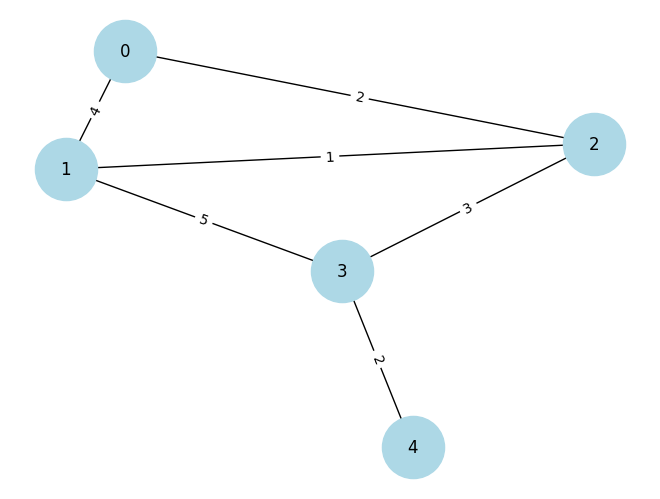

In [12]:
# Function to draw the graph using NetworkX
def draw_graph(graph):
    G = nx.Graph()
    for node in graph.graph:
        for neighbor, weight in graph.graph[node]:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

draw_graph(graph)


In [13]:
# Dijkstra's Algorithm
def dijkstra(graph, start):
    pq = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_dist, current_node = heapq.heappop(pq)

        for neighbor, weight in graph[current_node]:
            distance = current_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances


In [14]:
# A* Algorithm
def heuristic(a, b):
    return abs(a - b)  # Example heuristic (Manhattan Distance)

def astar(graph, start, goal):
    pq = PriorityQueue()
    pq.put((0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    while not pq.empty():
        _, current = pq.get()

        if current == goal:
            break

        for neighbor, weight in graph[current]:
            new_cost = cost_so_far[current] + weight
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                pq.put((priority, neighbor))
                came_from[neighbor] = current

    return cost_so_far, came_from


In [15]:
# Bellman-Ford Algorithm
def bellman_ford(graph, start):
    distance = {node: float('inf') for node in graph}
    distance[start] = 0

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbor, weight in graph[node]:
                if distance[node] + weight < distance[neighbor]:
                    distance[neighbor] = distance[node] + weight

    return distance


In [16]:
# Floyd-Warshall Algorithm
def floyd_warshall(graph):
    V = len(graph)
    dist = np.full((V, V), float('inf'))
    np.fill_diagonal(dist, 0)

    for node in graph:
        for neighbor, weight in graph[node]:
            dist[node][neighbor] = weight

    for k in range(V):
        for i in range(V):
            for j in range(V):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist


In [17]:
# Input start and goal nodes
start_node = int(input("\nEnter Start Node: "))
goal_node = int(input("Enter Goal Node: "))



Enter Start Node: 0
Enter Goal Node: 4


In [18]:
# Run algorithms
print("\n🔹 Running Dijkstra’s Algorithm...")
print("Shortest Distances:", dijkstra(graph.graph, start_node))

print("\n🔹 Running A* Algorithm...")
cost_so_far, came_from = astar(graph.graph, start_node, goal_node)
print("A* Path Cost:", cost_so_far)

print("\n🔹 Running Bellman-Ford Algorithm...")
print("Shortest Distances:", bellman_ford(graph.graph, start_node))

print("\n🔹 Running Floyd-Warshall Algorithm...")
print("Shortest Distances Matrix:\n", floyd_warshall(graph.graph))



🔹 Running Dijkstra’s Algorithm...
Shortest Distances: {0: 0, 1: 3, 2: 2, 3: 5, 4: 7}

🔹 Running A* Algorithm...
A* Path Cost: {0: 0, 1: 3, 2: 2, 3: 5, 4: 7}

🔹 Running Bellman-Ford Algorithm...
Shortest Distances: {0: 0, 1: 3, 2: 2, 3: 5, 4: 7}

🔹 Running Floyd-Warshall Algorithm...
Shortest Distances Matrix:
 [[0. 3. 2. 5. 7.]
 [3. 0. 1. 4. 6.]
 [2. 1. 0. 3. 5.]
 [5. 4. 3. 0. 2.]
 [7. 6. 5. 2. 0.]]
